# Build Preliminary Model

Make a model that predicts if Phil will see his shadow based on the temperature data from Pennsylvania and the Northeast.

## Clean and Format Data

In [1]:
import pandas as pd

### Load Data

Load the data from the CSV and use more terse column names.

In [4]:
df = pd.read_csv('data/phil-results-and-temperature.csv', encoding='utf-8')
df.columns = [
    'year', 'shadow', 
    'feb_temp', 'feb_temp_ne', 'feb_temp_mw', 'feb_temp_pa',
    'mar_temp', 'mar_temp_ne', 'mar_temp_mw', 'mar_temp_pa']

In [5]:
df

,year,shadow,feb_temp,feb_temp_ne,feb_temp_mw,feb_temp_pa,mar_temp,mar_temp_ne,mar_temp_mw,mar_temp_pa
0,1898,Full Shadow,35.37,24.8,33.3,26.7,41.05,38.0,46.0,42.0
1,1900,Full Shadow,30.76,21.4,27.5,24.1,41.27,26.0,37.9,29.3
2,1901,Full Shadow,29.86,16.0,26.2,18.9,40.71,30.8,41.9,35.1
3,1903,Full Shadow,28.42,24.5,31.3,28.0,42.21,40.4,47.7,44.5
4,1904,Full Shadow,31.59,15.0,28.2,19.2,41.76,29.8,42.8,34.0
...,...,...,...,...,...,...,...,...,...,...
110,2012,Full Shadow,37.51,30.6,38.6,34.3,50.41,43.4,56.3,47.7
111,2013,No Shadow,34.77,25.3,33.4,27.4,40.91,32.7,37.3,33.9
112,2014,Full Shadow,32.13,21.0,27.1,22.8,40.51,26.0,38.0,30.3
113,2015,Full Shadow,32.99,12.1,23.4,16.1,45.39,27.8,41.6,31.6


### Filter Columns

Select just the columns we need for our model and make the column names more focused.

In [6]:
df_filtered = df.filter(items=['shadow', 'feb_temp_ne', 'feb_temp_pa', 'mar_temp_ne', 'mar_temp_pa'])
df_filtered.columns = ['shadow', 'feb_temp_region', 'feb_temp_state', 'mar_temp_region', 'mar_temp_state']

In [7]:
df_filtered

,shadow,feb_temp_region,feb_temp_state,mar_temp_region,mar_temp_state
0,Full Shadow,24.8,26.7,38.0,42.0
1,Full Shadow,21.4,24.1,26.0,29.3
2,Full Shadow,16.0,18.9,30.8,35.1
3,Full Shadow,24.5,28.0,40.4,44.5
4,Full Shadow,15.0,19.2,29.8,34.0
...,...,...,...,...,...
110,Full Shadow,30.6,34.3,43.4,47.7
111,No Shadow,25.3,27.4,32.7,33.9
112,Full Shadow,21.0,22.8,26.0,30.3
113,Full Shadow,12.1,16.1,27.8,31.6


### Understand Our Data

In [12]:
df_filtered.shadow.value_counts()

Full Shadow    100
No Shadow       15
Name: shadow, dtype: int64

In [13]:
df_filtered.shadow.value_counts(normalize=True)

Full Shadow    0.869565
No Shadow      0.130435
Name: shadow, dtype: float64

array([[<AxesSubplot:title={'center':'feb_temp_region'}>,
        <AxesSubplot:title={'center':'feb_temp_state'}>],
       [<AxesSubplot:title={'center':'mar_temp_region'}>,
        <AxesSubplot:title={'center':'mar_temp_state'}>]], dtype=object)

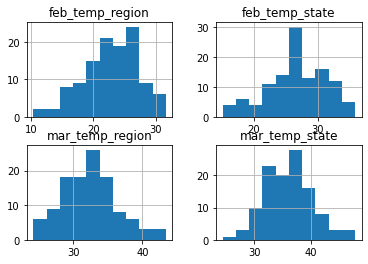

In [14]:
df_filtered.hist()

shadow
Full Shadow    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
No Shadow      [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

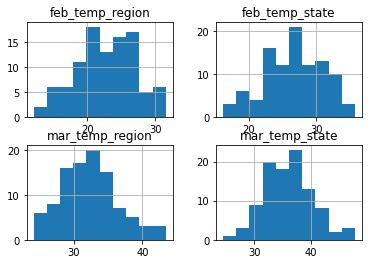

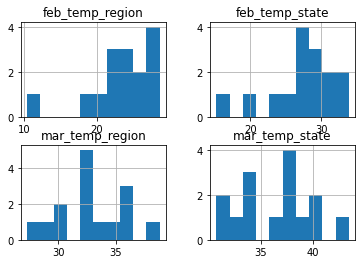

In [15]:
df_filtered.groupby('shadow').hist()

### Targets & Features

Get the values for the target and the features.

In [28]:
df_target = df_filtered.iloc[:, 0]
df_features = df_filtered.iloc[:, 1:].astype(float)

X, y = df_features.values, df_target.values

In [29]:
X.shape, y.shape

((115, 4), (115,))

### Balancing Our Data

Our data is way out of balance. Balance it to improve the results of our model.

In [33]:
from imblearn.over_sampling import RandomOverSampler

In [35]:
oversampler = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversampler.fit_resample(X, y)

In [36]:
X_over.shape, y_over.shape

((200, 4), (200,))

## Build the Model

### Train/Test Split

Split the training and testing data 80/20.

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, train_size=0.80, test_size=0.20, random_state=0)

In [70]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 4), (40, 4), (160,), (40,))

### Train a Support Vector Machine

In [184]:
from sklearn.svm import LinearSVC

In [185]:
svm = LinearSVC(dual=False, random_state=0).fit(X_train, y_train)

In [186]:
svm.predict(X_test)

array(['Full Shadow', 'Full Shadow', 'Full Shadow', 'No Shadow',
       'Full Shadow', 'Full Shadow', 'Full Shadow', 'No Shadow',
       'Full Shadow', 'Full Shadow', 'Full Shadow', 'Full Shadow',
       'No Shadow', 'Full Shadow', 'Full Shadow', 'Full Shadow',
       'Full Shadow', 'Full Shadow', 'Full Shadow', 'Full Shadow',
       'Full Shadow', 'Full Shadow', 'No Shadow', 'Full Shadow',
       'No Shadow', 'Full Shadow', 'No Shadow', 'Full Shadow',
       'No Shadow', 'No Shadow', 'Full Shadow', 'No Shadow', 'No Shadow',
       'No Shadow', 'No Shadow', 'Full Shadow', 'No Shadow',
       'Full Shadow', 'Full Shadow', 'Full Shadow'], dtype=object)

In [187]:
svm.score(X_test, y_test)

0.525

### Train a Logistic Regresion

In [188]:
from sklearn.linear_model import LogisticRegression

In [189]:
lr = LogisticRegression(solver='lbfgs', multi_class='ovr', random_state=0).fit(X_train, y_train)

In [190]:
lr.predict(X_test)

array(['Full Shadow', 'Full Shadow', 'Full Shadow', 'No Shadow',
       'Full Shadow', 'Full Shadow', 'Full Shadow', 'No Shadow',
       'Full Shadow', 'Full Shadow', 'Full Shadow', 'Full Shadow',
       'No Shadow', 'Full Shadow', 'Full Shadow', 'Full Shadow',
       'Full Shadow', 'Full Shadow', 'Full Shadow', 'Full Shadow',
       'Full Shadow', 'Full Shadow', 'No Shadow', 'Full Shadow',
       'No Shadow', 'Full Shadow', 'No Shadow', 'Full Shadow',
       'No Shadow', 'No Shadow', 'Full Shadow', 'No Shadow', 'No Shadow',
       'No Shadow', 'No Shadow', 'Full Shadow', 'No Shadow',
       'Full Shadow', 'Full Shadow', 'Full Shadow'], dtype=object)

In [192]:
lr.score(X_test, y_test)

0.525

### Train a Random Forest

In [193]:
from sklearn.ensemble import RandomForestClassifier

In [211]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0).fit(X_train, y_train)

In [212]:
    rf.predict(X_test)

array(['Full Shadow', 'No Shadow', 'No Shadow', 'No Shadow', 'No Shadow',
       'No Shadow', 'Full Shadow', 'No Shadow', 'Full Shadow',
       'No Shadow', 'Full Shadow', 'No Shadow', 'No Shadow', 'No Shadow',
       'No Shadow', 'Full Shadow', 'Full Shadow', 'No Shadow',
       'No Shadow', 'Full Shadow', 'No Shadow', 'No Shadow',
       'Full Shadow', 'No Shadow', 'Full Shadow', 'No Shadow',
       'No Shadow', 'No Shadow', 'No Shadow', 'Full Shadow',
       'Full Shadow', 'No Shadow', 'No Shadow', 'No Shadow', 'No Shadow',
       'No Shadow', 'No Shadow', 'Full Shadow', 'No Shadow', 'No Shadow'],
      dtype=object)

In [213]:
    rf.score(X_test, y_test)

0.8

### Train a KNN Classifier

In [201]:
from sklearn.neighbors import KNeighborsClassifier

In [205]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [206]:
knn.predict(X_test)

array(['Full Shadow', 'No Shadow', 'Full Shadow', 'No Shadow',
       'No Shadow', 'No Shadow', 'No Shadow', 'No Shadow', 'Full Shadow',
       'No Shadow', 'No Shadow', 'No Shadow', 'No Shadow', 'No Shadow',
       'Full Shadow', 'No Shadow', 'No Shadow', 'No Shadow',
       'Full Shadow', 'No Shadow', 'No Shadow', 'No Shadow',
       'Full Shadow', 'No Shadow', 'Full Shadow', 'No Shadow',
       'No Shadow', 'No Shadow', 'No Shadow', 'Full Shadow',
       'Full Shadow', 'Full Shadow', 'No Shadow', 'No Shadow',
       'No Shadow', 'No Shadow', 'No Shadow', 'Full Shadow',
       'Full Shadow', 'No Shadow'], dtype=object)

In [207]:
knn.score(X_test, y_test)

0.8

# Build Main Model

Make a model that predicts if Phil will see his shadow based on the temperature data for the state, the temperature data for the region, and the latitude of the requester.

## Merge Weather Data

Combine the monthy average temperatures for state and region into a single file.

## Predict for All the States

Using the first model, predict Shadow/No Shadow for temperates for all the states over time. Build a file of lattitude, longitude, state temperatures, regional temperatures, and shadow.

## Build Model using the New File

Using the new data, build a model to predict Phil's shadow everywhere groundhogs are to be found.